<a href="https://colab.research.google.com/github/jonasfontouras/alura-data-science/blob/main/intDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando as notas em geral**

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
notas = pd.read_csv("ratings.csv")

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

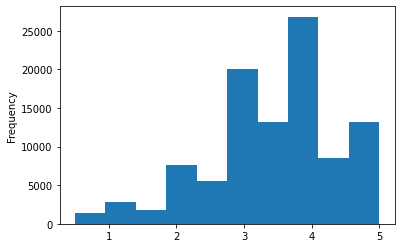

In [ ]:

notas.nota.plot(kind="hist")

In [ ]:
#median = mediana -> valor que divide nossos dados na metade 
#mean = média de todos os valores
print("Media", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [ ]:
#Para tirar a media, mediana e tantas outras medidas de nosso código -> describe()
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


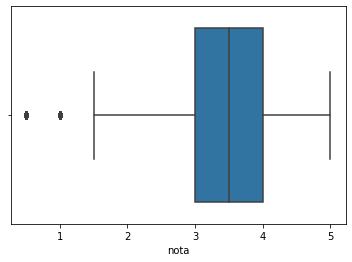

In [ ]:
#Para visualizar a posição dos valores em espécie de "caixa"
sns.boxplot(notas.nota)

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#**Analisando algumas notas específicas por filme**

In [ ]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

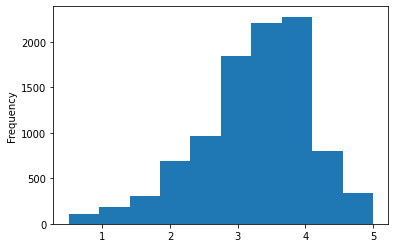

In [ ]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


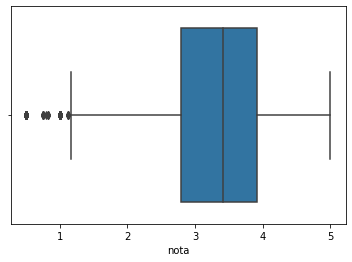

In [ ]:
#Utilizando biblioteca gráfica do Seaborn.
sns.boxplot(medias_por_filme)

In [ ]:
#Pedindo as medidas descritivas desses dados com o describe()
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


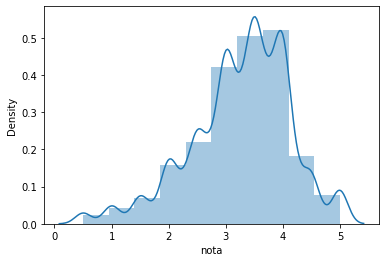

In [ ]:
#Gráfido de distribuição do Seaborn (Histograma) -> displot()
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

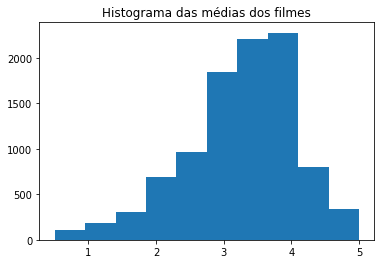

In [ ]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

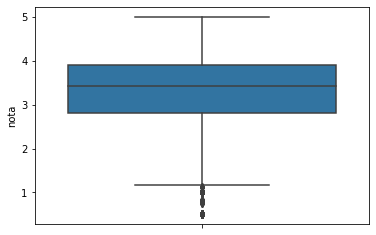

In [ ]:
sns.boxplot(y=medias_por_filme)

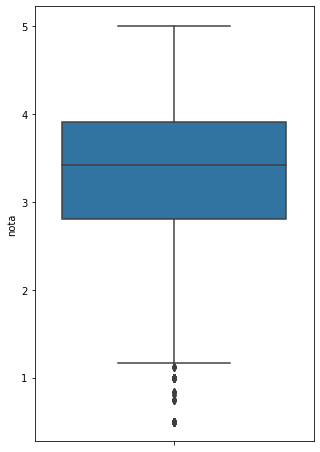

In [ ]:
#Configura as dimensões de tamanho da imagem
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

#**Data Visualization** 

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#Unique -> valores únicos de determinada coluna:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#Quantidade de vezes que cada idioma aparece na série
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
id       2
cs       2
ro       2
ta       2
ar       2
ky       1
hu       1
xx       1
te       1
el       1
pl       1
no       1
is       1
ps       1
af       1
nb       1
sl       1
tr       1
vi       1
Name: original_language, dtype: int64

In [ ]:
#Criando um dataframe a partir de um índice com toframe()
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [ ]:
#Valores em duas colunas separando-os do índice com reset_index
#O índice se tornará um coluna(chamda index);
#A coluna original_language será mantida;
#Teremos um índice separado, numerado a partir do zero.
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
#Renomeando as colunas para ficarem mais legíveis
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


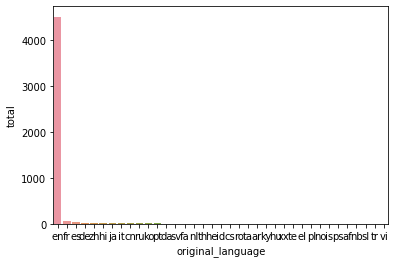

In [ ]:
#Visualizando as categorias acima, plotando-as em um gráfico de "baixo nível" (barplot())
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

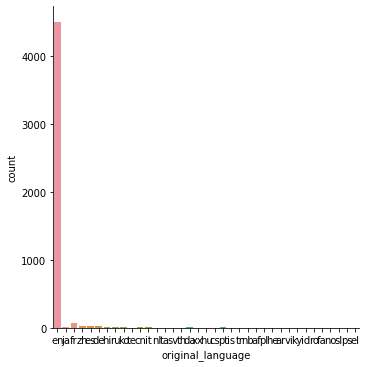

In [ ]:
#Visualizando as categorias acima, de forma mais controlada, com mais alto nível utilizando o catplot()
#catplot() realiza plotagem baseada em categorias 
#original_language com paramêtro do eixo x
#tmdb como fonte de dados (data)
#Contagem de quantas vezes a categoria aparece utilizando o kind, que define o tipo de plotagem a ser usado, no eixo y
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7f068e046c10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

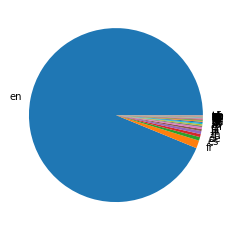

In [ ]:
#Gráfico de pizza com plt.pie() (Matplotlib)
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

In [ ]:
#Separando o English do restante das outras linguas utilizando o atributo loc (de "locate") passando o "en como parametro":
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc["en"]

#Soma de todos os valores em total_por_lingua
total_geral = total_por_lingua.sum()

#Restante das linguas separadas do inglês
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
#Criando um dicionário com duas colunas chamado dados
#Contendo a coluna "lingua" com os valores "inglês" e "outros" 
#E outra chamada "total" com os valores "total_de_inglês" e "total_do_resto"
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

#Utilizando a função DataFrame() do Pandas passando o dicionário "dados" como parâmetro para criarmos o dataframe
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [ ]:
#Podendo sobrescrever a variável, mantendo os mesmos resultados
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


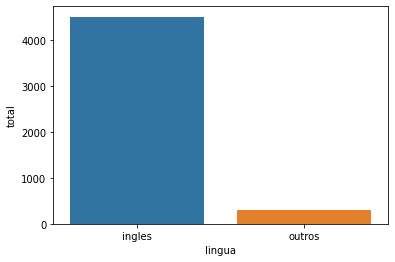

In [ ]:
#Plotando os dados acima em um gráfico, passando os dados e definindo os eixos x e y
#Com o gráfico abaixo conseguimos identificar, expressando como gostaríamos, a incidência da língua inglesa em relação às demais

sns.barplot(data=dados, x="lingua", y="total")

([<matplotlib.patches.Wedge at 0x7f068dec6d50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

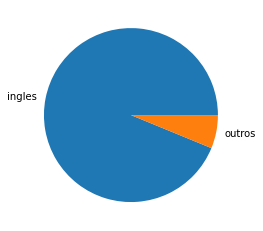

In [ ]:
#Visualizando as outras categorias
plt.pie(dados["total"], labels=dados["lingua"])

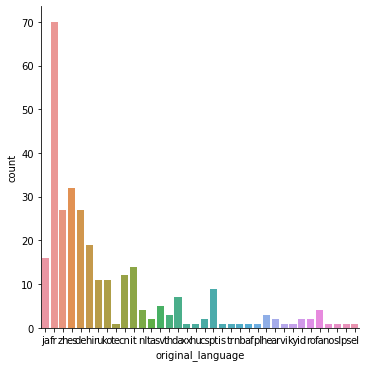

In [ ]:
#Utilizando o query para remover todos os elementos do dataset que não compartilham a lingua inglesa
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

#Plotando de uma vez só as categorias contidas nesse conjunto, agrupando as linhas e contando-as
sns.catplot(x="original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

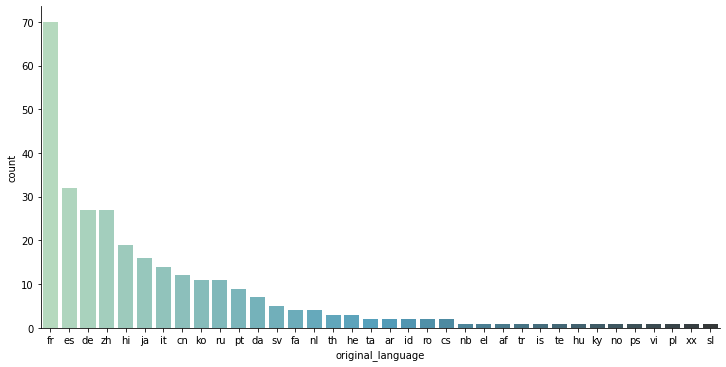

In [ ]:
#Refinando o gráfico acima com parâmetros da documentação:
sns.catplot(x="original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count",
            aspect=2, #Dobro do padrão para gerar um retang da fig
            palette="GnBu_d",
            order=total_por_lingua_de_outros_filmes.index #Ordena os valores  utilizando o índice da variável como parâmetro de ordem decrescente
            )